# EDA for Capstone Project 1:

## Air Quality Data

### Some description of the data

#### Context

This is a time series air quality dataset with categorical contextual information (time and weather), the air pollution (pm2.5) values were collected from sense-boxes which are installed in Frankfurt, Germany. Dataset has readings from 14 different sensors, located in close spatial proximity. the dataset was efficiently labelled and can be used as a gold-standard dataset for unsupervised problems.

#### Content

Dataset has 14 columns with mixed data i.e. numerical and categorical data.
more than 1200000 records with no missing values.

#### Acknowledgement

This dataset was created by Avinash Bagul, Different unsupervised approaches on this dataset can be found on his Github (https://github.com/avibagul).

In [1]:
!pwd

/home/vinesh/code/laldeomaroam/M2M/Capstone Project


### Import the necessray libraries

In [2]:
import pandas as pd

### Read from the data folder

In [3]:
df = pd.read_csv('./Data/Air Quality Dataset/Air Quality Benchmark dataset.csv')

### Profiling the columns to explore the qualitative values and range of quantitative values

In [4]:
# Check the shape of the DataFrame
print(df.shape)

(1230693, 14)


In [5]:
# Check the data types of each column
print(df.dtypes)

Time_stamp              object
boxName                 object
PM 2.5                 float64
temp                   float64
pressure                 int64
humidity                 int64
wind_speed             float64
Time of Day             object
Peak/NoPeak             object
Day                     object
Week Day                object
Weather                 object
Weather Description     object
label                   object
dtype: object


In [6]:
# Check for missing values
print(df.isnull().sum())

Time_stamp             0
boxName                0
PM 2.5                 0
temp                   0
pressure               0
humidity               0
wind_speed             0
Time of Day            0
Peak/NoPeak            0
Day                    0
Week Day               0
Weather                0
Weather Description    0
label                  0
dtype: int64


In [7]:
df.head()

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
0,2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
1,2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2,2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
3,2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
4,2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal


In [8]:
# Convert Time_stamp to datetime
df['Time_stamp'] = pd.to_datetime(df['Time_stamp'])
print(df.dtypes)

Time_stamp             datetime64[ns]
boxName                        object
PM 2.5                        float64
temp                          float64
pressure                        int64
humidity                        int64
wind_speed                    float64
Time of Day                    object
Peak/NoPeak                    object
Day                            object
Week Day                       object
Weather                        object
Weather Description            object
label                          object
dtype: object


In [169]:
# Summary statistics
print(round(df.describe(),2))

           PM 2.5        temp    pressure    humidity  wind_speed
count  1230693.00  1230693.00  1230693.00  1230693.00  1230693.00
mean         8.34        9.81     1015.27       75.33        3.78
std         12.45        7.73       10.68       18.76        2.31
min          0.00       -8.91      976.00       14.00        0.31
25%          2.47        4.14     1009.00       65.00        2.10
50%          5.00        8.20     1015.00       80.00        3.60
75%         10.90       14.69     1022.00       92.00        5.10
max        999.90       39.28     1046.00      100.00       17.50


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='humidity', ylabel='Density'>

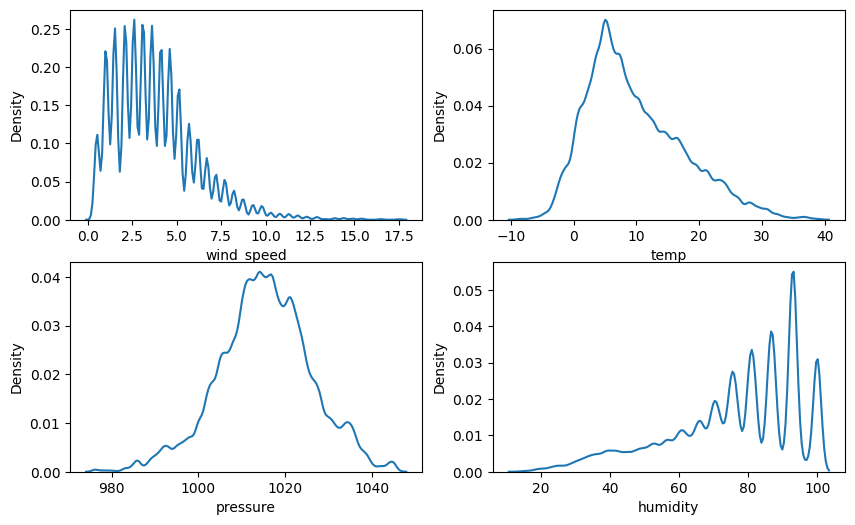

In [200]:

#df[['temp','PM 2.5','pressure','humidity','wind_speed']].plot(kind="box")
#df['pressure'].plot(kind="box")
#import seaborn as sns
plt.figure(figsize = (10, 6))

plt.subplot(321)
sns.kdeplot(df['PM 2.5'])

plt.subplot(221)
sns.kdeplot(df['wind_speed'])

plt.subplot(222)
sns.kdeplot(df['temp'])

plt.subplot(223)
sns.kdeplot(df['pressure'])

plt.subplot(224)
sns.kdeplot(df['humidity'])

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

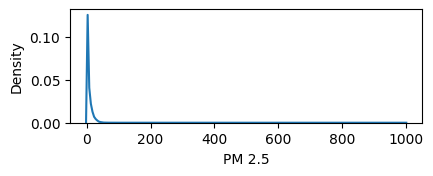

In [199]:
plt.figure(figsize = (10, 5))
plt.subplot(321)
sns.kdeplot(df['PM 2.5'])

In [10]:
df.nunique()

Time_stamp             1188195
boxName                     14
PM 2.5                    4831
temp                      3070
pressure                    71
humidity                    87
wind_speed                  86
Time of Day                  4
Peak/NoPeak                  2
Day                          7
Week Day                     2
Weather                     23
Weather Description         68
label                        2
dtype: int64

In [11]:
df['boxName'].unique()

array(['iGude', 'Rothschildallee', 'Bernem', 'FeinstaubFFM',
       'Frankfurt_Riederwald', 'MousonSense', 'nordsand',
       'Medienzentrum Frankfurt', 'FFM_Westend_Sued', 's4', 'ioki',
       'Luftdaten.info [6703181]', 'Ginnheim_Dust_Light_Temp',
       'Alt Bornheim Feinstaub'], dtype=object)

In [12]:
df['Time of Day'].unique()

array(['Evening_Hours', 'Night_Hours', 'Morning_Hours', 'Afternoon_Hours'],
      dtype=object)

In [13]:
df['Day'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [14]:
df['Weather'].unique()

array(['Clouds', 'Mist', 'Fog', 'Rain', 'Drizzle', 'Drizzle + Rain',
       'Clear', 'Snow', 'Snow + Mist', 'Drizzle + Snow + Mist',
       'Drizzle + Rain + Mist', 'Drizzle + Mist', 'Rain + Snow',
       'Rain + Mist', 'Mist + Fog', 'Thunderstorm + Rain', 'Squall',
       'Haze', 'Thunderstorm', 'Thunderstorm + Squall', 'Rain + Fog',
       'Snow + Mist + Fog', 'Snow + Fog'], dtype=object)

In [15]:
df['Weather Description'].unique()

array(['broken clouds', 'overcast clouds', 'mist', 'fog', 'light rain',
       'light intensity drizzle',
       'light intensity drizzle + moderate rain', 'moderate rain',
       'scattered clouds', 'light intensity shower rain',
       'proximity shower rain', 'few clouds', 'sky is clear',
       'light rain and snow', 'light intensity drizzle rain',
       'light snow', 'light snow + mist', 'light rain and snow + mist',
       'light intensity drizzle + light snow + mist',
       'light intensity drizzle + light rain + mist',
       'light intensity drizzle + mist', 'drizzle + mist',
       'light intensity drizzle rain + moderate rain',
       'light intensity drizzle rain + light rain',
       'light intensity drizzle rain + light rain + mist', 'shower rain',
       'light rain + light rain and snow', 'light shower snow',
       'light rain + light snow', 'snow', 'light rain + mist',
       'mist + fog', 'heavy intesity shower rain', 'drizzle',
       'proximity thunderstorm + sho

In [16]:
df['label'].unique()

array(['normal', 'abnormal'], dtype=object)

### Lets understands the data at hand

Since we are measuring Air Quality, hence lets look at what is a measure (KPI) that would be useful for that purpose:

PM2.5 is used when describing pollutant levels both outdoor and indoor, where health impact from exposure considers amount of PM2.5 over a 24-hour period. Most studies indicate PM2.5 at or below 12 μg/m3 is considered healthy with little to no risk from exposure. If the level goes to or above 35 μg/m3 during a 24-hour period, the air is considered unhealthy and can cause issues for people with existing breathing issues such as asthma. Prolonged exposure to levels above 50 μg/m3 can lead to serious health issues and premature mortality.

Here we have a columns with values for the PM 2.5, and lets dive in the range to see if we can cover all possible cases: 

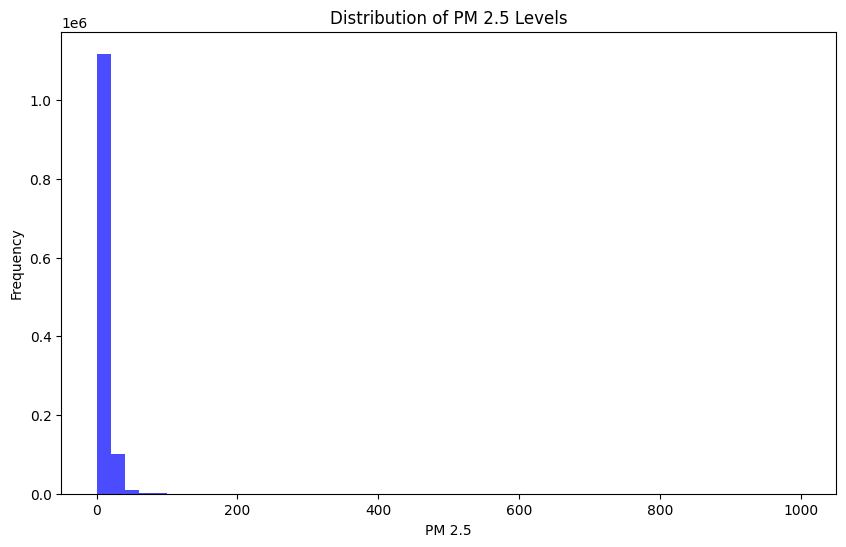

In [17]:
import matplotlib.pyplot as plt 
# Plot the distribution of PM 2.5 levels
plt.figure(figsize=(10, 6))
plt.hist(df['PM 2.5'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of PM 2.5 Levels')
plt.xlabel('PM 2.5')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of obeservations by boxName')

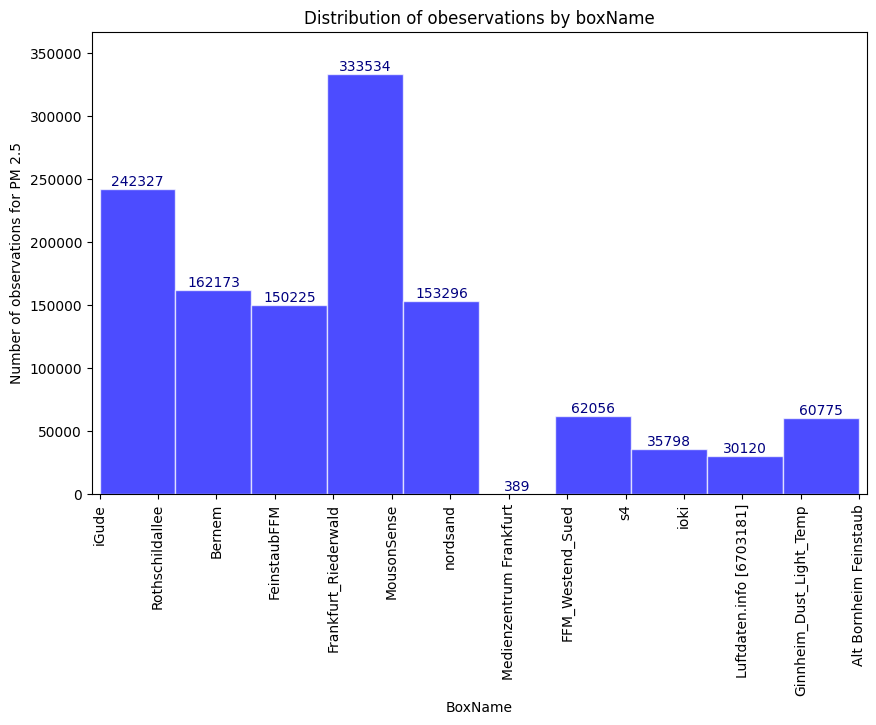

In [49]:
plt.figure(figsize=(10, 6))
values, bins, bars = plt.hist(df['boxName'], bins=10, color='blue', alpha=0.7, edgecolor ='white')
plt.xlabel("BoxName")
plt.ylabel("Number of observations for PM 2.5")
plt.bar_label(bars, fontsize=10, color='navy')
plt.margins(x=0.01, y=0.1)
plt.xticks(rotation=90)
plt.title('Distribution of obeservations by boxName')

In [68]:
df[df['PM 2.5'] > 15]

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
0,2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
1,2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2,2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
3,2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
4,2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220382,2020-02-24 16:19:33,Ginnheim_Dust_Light_Temp,16.30,8.74,1009,93,3.60,Afternoon_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
1220383,2020-02-24 16:20:44,Ginnheim_Dust_Light_Temp,16.90,8.74,1009,93,3.60,Afternoon_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
1220385,2020-02-24 16:23:04,Ginnheim_Dust_Light_Temp,15.50,8.74,1009,93,3.60,Afternoon_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
1224884,2020-02-28 08:26:03,Ginnheim_Dust_Light_Temp,15.90,1.99,1016,80,5.10,Morning_Hours,Peak,Friday,Workday,Clouds,few clouds,normal


In [98]:
Mean_by_boxName = (df.groupby([df["boxName"]])['PM 2.5'].mean())
Mean_by_boxName = Mean_by_boxName.reset_index()
Mean_by_boxName
#plt.hist((df.groupby([df["boxName"]])['PM 2.5'].count()), bins=10, color='blue', alpha=0.7, edgecolor ='white')

,boxName,PM 2.5
0,Alt Bornheim Feinstaub,2.094907
1,Bernem,10.105528
2,FFM_Westend_Sued,7.672795
3,FeinstaubFFM,7.594132
4,Frankfurt_Riederwald,8.812270
5,Ginnheim_Dust_Light_Temp,10.452228
6,Luftdaten.info [6703181],7.082105
7,Medienzentrum Frankfurt,1.744987
8,MousonSense,8.522746
9,Rothschildallee,6.792860


In [120]:
 round(Mean_by_boxName['PM 2.5'],2)

0      2.09
1     10.11
2      7.67
3      7.59
4      8.81
5     10.45
6      7.08
7      1.74
8      8.52
9      6.79
10     8.68
11     9.95
12     7.50
13    10.47
Name: PM 2.5, dtype: float64

<Figure size 1100x100 with 0 Axes>

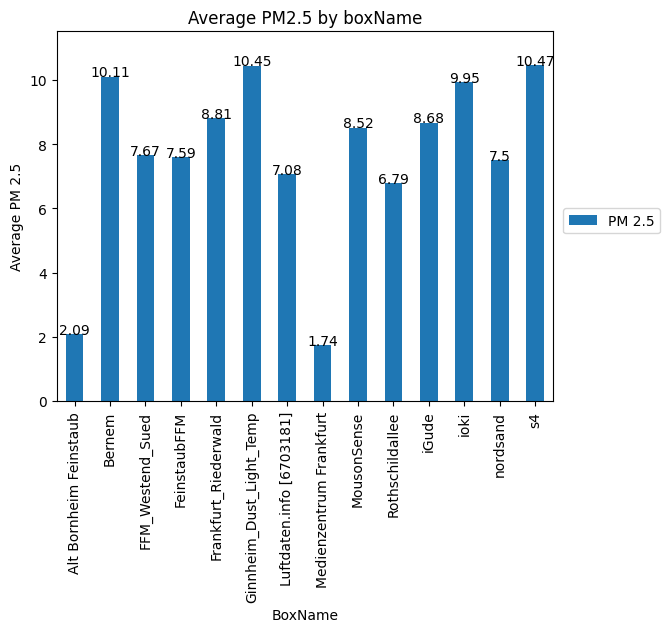

In [134]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
x = Mean_by_boxName['boxName']
y =  round(Mean_by_boxName['PM 2.5'],2)
plt.figure(figsize=(11, 1))
Mean_by_boxName.plot('boxName','PM 2.5',kind='bar')
plt.xlabel("BoxName")
plt.ylabel("Average PM 2.5")
plt.bar_label(bars, fontsize=10, color='navy')
plt.margins(x=0.01, y=0.1)
addlabels(x,y)
plt.xticks(rotation=90)
plt.title('Average PM2.5 by boxName')
plt.legend(loc="lower right",bbox_to_anchor=(1.230, 0.435))
plt.show()


In [207]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
x = Mean_by_boxName['boxName']
y =  round(Mean_by_boxName['PM 2.5'],2)
plt.figure(figsize=(11, 1))
Mean_by_boxName.plot('boxName','temp',kind='bar')
plt.xlabel("BoxName")
plt.ylabel("Average PM 2.5")
plt.bar_label(bars, fontsize=10, color='navy')
plt.margins(x=0.01, y=0.1)
addlabels(x,y)
plt.xticks(rotation=90)
plt.title('Average PM2.5 by boxName')
plt.legend(loc="lower right",bbox_to_anchor=(1.230, 0.435))
plt.show()

KeyError: 'temp'

<Figure size 1100x100 with 0 Axes>

In [122]:
Mean_by_TimeOfDay = (df.groupby([df['Time of Day']])['PM 2.5'].mean())
Mean_by_TimeOfDay = Mean_by_TimeOfDay.reset_index()
Mean_by_TimeOfDay

,Time of Day,PM 2.5
0,Afternoon_Hours,6.677920
1,Evening_Hours,7.945947
2,Morning_Hours,8.374805
3,Night_Hours,9.418068


<Figure size 1100x100 with 0 Axes>

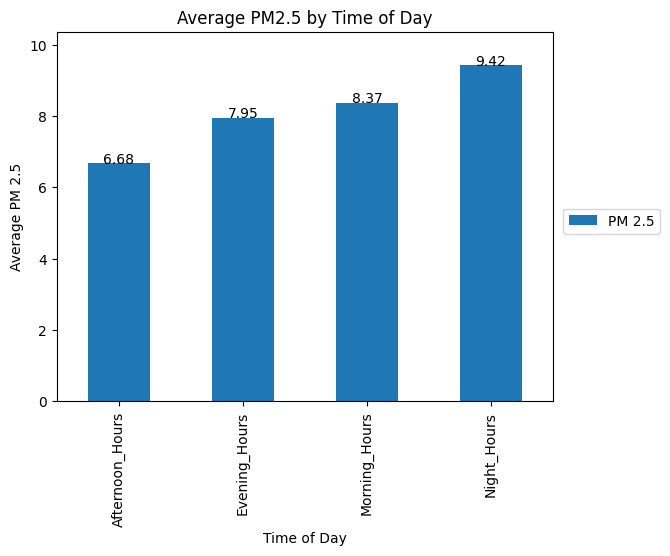

In [143]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
x = Mean_by_TimeOfDay['Time of Day']
y =  round(Mean_by_TimeOfDay['PM 2.5'],2)

plt.figure(figsize=(11, 1))
Mean_by_TimeOfDay.plot('Time of Day','PM 2.5',kind='bar')
addlabels(x,y)
plt.xlabel("Time of Day")
plt.ylabel("Average PM 2.5")
plt.bar_label(bars, fontsize=10, color='navy')

plt.margins(x=0.01, y=0.1)

plt.xticks(rotation=90)
plt.title('Average PM2.5 by Time of Day')
plt.legend(loc="lower right",bbox_to_anchor=(1.230, 0.435))
plt.show()

In [139]:
Mean_by_Day = (df.groupby([df['Day']])['PM 2.5'].mean())
Mean_by_Day = Mean_by_Day.reset_index()
Mean_by_Day

,Day,PM 2.5
0,Friday,8.888025
1,Monday,8.278406
2,Saturday,8.323707
3,Sunday,7.879518
4,Thursday,8.771257
5,Tuesday,8.053668
6,Wednesday,8.207263


<Figure size 1100x100 with 0 Axes>

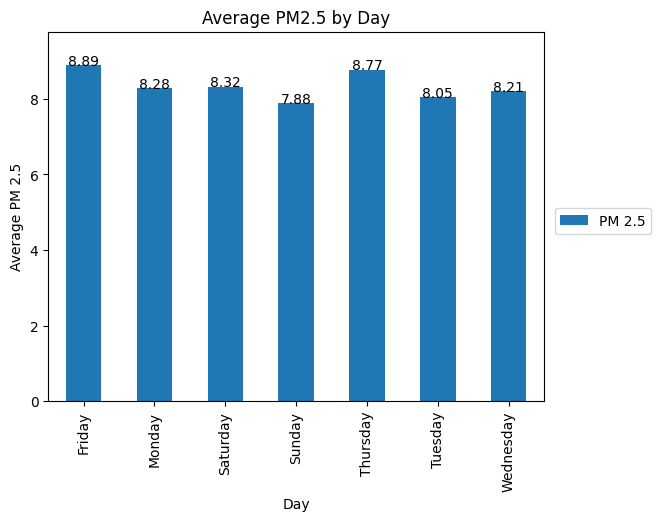

In [141]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
x = Mean_by_Day['Day']
y =  round(Mean_by_Day['PM 2.5'],2)

plt.figure(figsize=(11, 1))
Mean_by_Day.plot('Day','PM 2.5',kind='bar')
addlabels(x,y)
plt.xlabel("Day")
plt.ylabel("Average PM 2.5")
plt.bar_label(bars, fontsize=10, color='navy')

plt.margins(x=0.01, y=0.1)

plt.xticks(rotation=90)
plt.title('Average PM2.5 by Day')
plt.legend(loc="lower right",bbox_to_anchor=(1.230, 0.435))
plt.show()

In [144]:
Mean_by_Weather = (df.groupby([df['Weather']])['PM 2.5'].mean())
Mean_by_Weather = Mean_by_Weather.reset_index()
Mean_by_Weather

,Weather,PM 2.5
0,Clear,8.205131
1,Clouds,7.582518
2,Drizzle,11.230576
3,Drizzle + Mist,22.715303
4,Drizzle + Rain,6.499146
5,Drizzle + Rain + Mist,16.029840
6,Drizzle + Snow + Mist,22.193667
7,Fog,24.641120
8,Haze,41.944826
9,Mist,33.044674


<Figure size 1100x100 with 0 Axes>

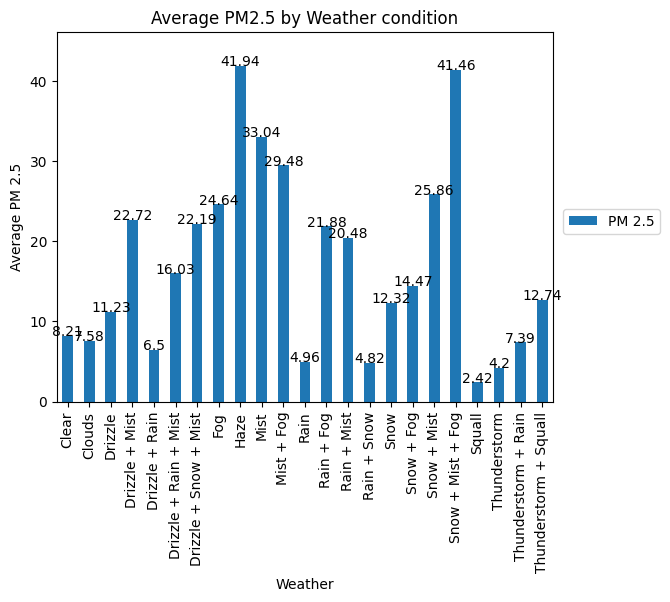

In [145]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
x = Mean_by_Weather['Weather']
y =  round(Mean_by_Weather['PM 2.5'],2)

plt.figure(figsize=(11, 1))
Mean_by_Weather.plot('Weather','PM 2.5',kind='bar')
addlabels(x,y)
plt.xlabel("Weather")
plt.ylabel("Average PM 2.5")
plt.bar_label(bars, fontsize=10, color='navy')

plt.margins(x=0.01, y=0.1)

plt.xticks(rotation=90)
plt.title('Average PM2.5 by Weather condition')
plt.legend(loc="lower right",bbox_to_anchor=(1.230, 0.435))
plt.show()

### Lets summarize the findings with the categorical variables with PM 2.5

In [156]:
df[['boxName','Day','Time of Day','Weather']]

,boxName,Day,Time of Day,Weather
0,iGude,Monday,Evening_Hours,Clouds
1,iGude,Monday,Evening_Hours,Clouds
2,iGude,Monday,Evening_Hours,Clouds
3,iGude,Monday,Evening_Hours,Clouds
4,iGude,Monday,Evening_Hours,Clouds
...,...,...,...,...
1230688,Alt Bornheim Feinstaub,Friday,Evening_Hours,Clear
1230689,Alt Bornheim Feinstaub,Friday,Evening_Hours,Clear
1230690,Alt Bornheim Feinstaub,Friday,Evening_Hours,Clear
1230691,Alt Bornheim Feinstaub,Friday,Evening_Hours,Clear


### Lets identify any correlation between the numeric variables

              PM 2.5      temp  pressure  humidity  wind_speed
PM 2.5      1.000000 -0.230663  0.159544  0.242168   -0.262562
temp       -0.230663  1.000000 -0.147346 -0.627235    0.078195
pressure    0.159544 -0.147346  1.000000 -0.111340   -0.297220
humidity    0.242168 -0.627235 -0.111340  1.000000   -0.287520
wind_speed -0.262562  0.078195 -0.297220 -0.287520    1.000000


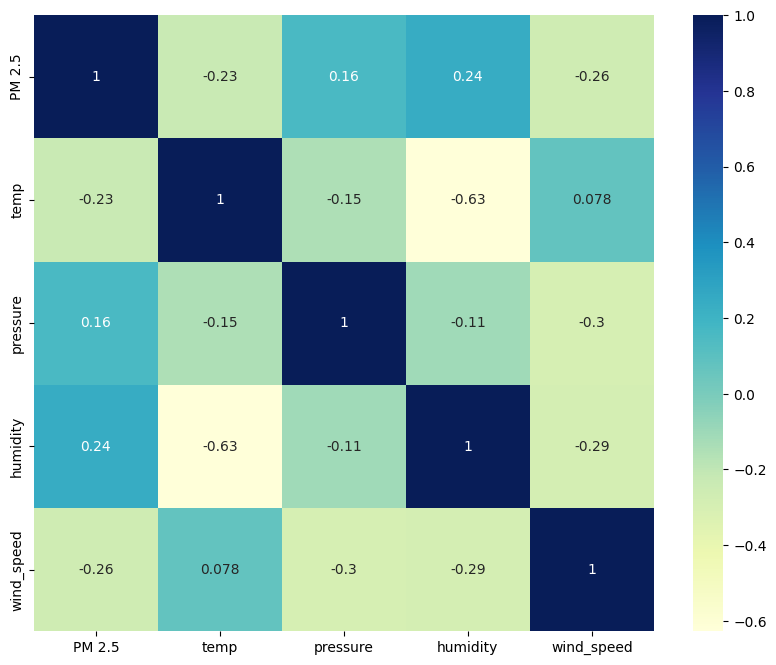

In [168]:
# Import modules
import seaborn as sb

print(df.corr())

# Plotting correlation heatmap
df_data = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

In [151]:
df.head()

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
0,2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
1,2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2,2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
3,2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
4,2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal


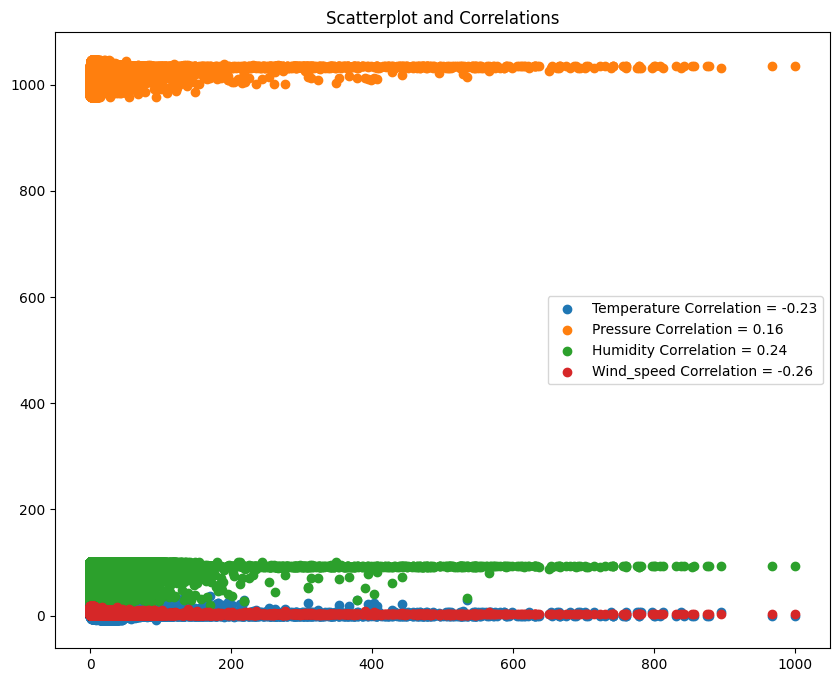

In [153]:
import numpy as np
# Scatterplot and Correlations
# Data
PM_2_5 = df['PM 2.5']
Temperature = df['temp']
Pressure = df['pressure']
Humidity = df['humidity']
Wind_speed = df['wind_speed']

# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(PM_2_5, Temperature, label=f'Temperature Correlation = {np.round(np.corrcoef(PM_2_5,Temperature)[0,1], 2)}')
plt.scatter(PM_2_5, Pressure, label=f'Pressure Correlation = {np.round(np.corrcoef(PM_2_5,Pressure)[0,1], 2)}')
plt.scatter(PM_2_5, Humidity, label=f'Humidity Correlation = {np.round(np.corrcoef(PM_2_5,Humidity)[0,1], 2)}')
plt.scatter(PM_2_5, Wind_speed, label=f'Wind_speed Correlation = {np.round(np.corrcoef(PM_2_5,Wind_speed)[0,1], 2)}')



# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()


In [ ]:
#import the matplotlib library
import matplotlib.pyplot as plt

# Sort the dataset in the ascending order of date
df = df.sort_values(by = 'Time_stamp')

# Extract the date and close price columns
boxName = df['boxName']
airQuality = df['PM 2.5']

# Create a line plot
plt.bar(boxName, airQuality)

# Show the plot
plt.show()

In [ ]:
df['PM 2.5'].min()

In [ ]:
df['PM 2.5'].max()

Next lets see if we have a proper calendar span for the measurements

In [ ]:
df['Time_stamp'].min()

In [ ]:
df['Time_stamp'].max()

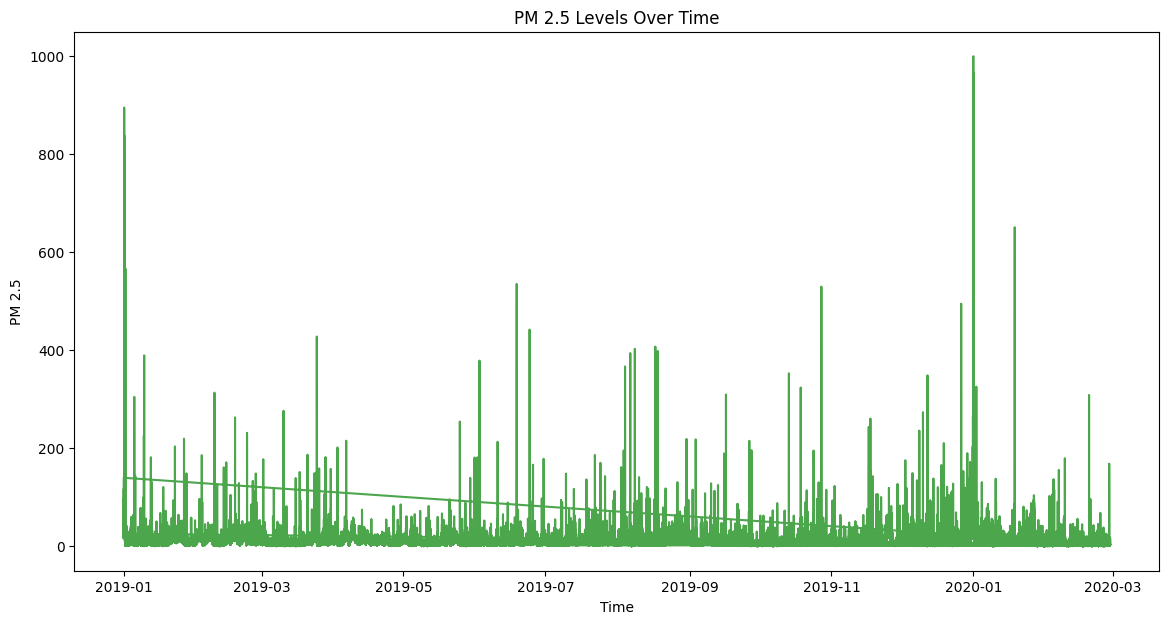

In [206]:
# Convert Time_stamp to datetime
df['Time_stamp'] = pd.to_datetime(df['Time_stamp'])

# Plot PM 2.5 levels over time
plt.figure(figsize=(14, 7))
plt.plot(df['Time_stamp'], df['PM 2.5'], color='green', alpha=0.7)
plt.title('PM 2.5 Levels Over Time')
plt.xlabel('Time')
plt.ylabel('PM 2.5')
plt.show()


We can also compare PM 2.5 levels across different boxes.

In [ ]:
len(df['boxName'].unique())

In [ ]:
# Group by boxName and plot PM 2.5 levels
plt.figure(figsize=(14, 7))
for box in df['boxName'].unique():
    box_data = df[df['boxName'] == box]
    plt.plot(box_data['Time_stamp'], box_data['PM 2.5'], label=box)

plt.title('PM 2.5 Levels by Box Name')
plt.xlabel('Time')
plt.ylabel('PM 2.5')
plt.legend(loc="lower right",bbox_to_anchor=(1.230, 0.435))
plt.show()

In [ ]:
df["Time_stamp"].max() - df["Time_stamp"].min()

In [ ]:
df["month"] = df["Time_stamp"].dt.month

In [ ]:
df["year"] = df["Time_stamp"].dt.year

In [ ]:
df["day"] = df["Time_stamp"].dt.day

In [ ]:
df["hour"] = df["Time_stamp"].dt.hour

In [ ]:
df["day_of_week"] = df["Time_stamp"].dt.dayofweek

In [ ]:
df.head()

In [ ]:
df['year'].unique()

In [ ]:
df.value_counts('PM 2.5').plot()

##### The WHO air quality guideline (AQG) states that annual average concentrations of PM2.5 should not exceed ***5 µg/m3***, while 24-hour average exposures should not exceed ***15 µg/m3*** more than 3 - 4 days per year.

Interim targets have been set to support the planning of incremental milestones toward cleaner air, particularly for cities, regions and countries that are struggling with high air pollution levels. For PM2.5 these are:

* 35 µg/m3 annual mean, 75 µg/m3 24-hour mean.
* 25 µg/m3 annual mean, 50 µg/m3 24-hour mean.
* 15 µg/m3 annual mean, 37.5 µg/m3 24-hour mean.
* 10 µg/m3 annual mean, 25 µg/m3 24-hour mean

In [ ]:
df[(df.year == 2018)]

In [ ]:
df.groupby([df["Time_stamp"].dt.year,"boxName"]).agg(Average_PM=('PM 2.5','mean'),Max_PM=('PM 2.5','max'),Min_PM=('PM 2.5','min'))

In [ ]:
df_boxname_grouping = df.groupby([df["Time_stamp"].dt.year,"boxName"]).agg(Average_PM=('PM 2.5','mean'),Max_PM=('PM 2.5','max'),Min_PM=('PM 2.5','min'))
df_boxname_grouping

In [ ]:
df_boxname_grouping.columns

In [ ]:
df_boxname_grouping.index

In [ ]:
df_boxname_grouping.reset_index(inplace=True)

In [ ]:
df_boxname_grouping

In [ ]:
# Group by boxName and plot PM 2.5 levels
plt.figure(figsize=(14, 7))
for box in df_boxname_grouping['boxName'].unique():
    box_data = df_boxname_grouping[df_boxname_grouping['boxName'] == box]
    plt.plot(box_data['Time_stamp'], box_data['Average_PM'], label=box)


plt.title('PM 2.5 Levels by Box Name')
plt.xlabel('Time')
plt.ylabel('PM 2.5')
plt.legend(loc="lower right",bbox_to_anchor=(1.230, 0.435))
plt.show()

In [ ]:
df_avg_daily = df.groupby([df["Time_stamp"].dt.year,df["Time_stamp"].dt.month,df["Time_stamp"].dt.day,"boxName"]).agg(Average_PM=('PM 2.5','mean'))
df_avg_daily

In [ ]:
type(df_avg_daily.index)

In [ ]:
df_avg_daily.index.set_names('Year',level=0,inplace=True)
df_avg_daily.index.set_names('Month',level=1,inplace=True)
df_avg_daily.index.set_names('Day',level=2,inplace=True)

In [ ]:
df_avg_daily.reset_index(inplace=True)

In [ ]:
df_avg_daily.plot()

In [ ]:
def PM_KPI(value):
    if value <= 25:
        return "Less than 25, healthy"
    if 25 < value <= 35.5:
        return "More than 25, Less than 37.5, unhealthy"
    if 37.5 < value <= 50:
        return "More than 37.5, Less than 50, very unhealthy"
    if 50 < value <= 75:
        return "More than 50, Less than 75, extremely unhealthy"
    if value > 75:
        return "Lethal"
    
df_avg_daily['Average_PM_ratings'] = df_avg_daily ['Average_PM'].map(PM_KPI)
display(df_avg_daily.head())

In [ ]:
df_avg_ranking = df_avg_daily.groupby([df_avg_daily["Year"],df_avg_daily["Month"],"boxName","Average_PM_ratings"])["Average_PM_ratings"].count().reset_index(name="count")
df_avg_ranking

In [ ]:
df_avg_ranking[df_avg_ranking["Year"]>2018].groupby(["Year","boxName","Average_PM_ratings"])["count"].count().plot()


In [ ]:
df_avg_ranking[['Average_PM_ratings','count']].plot(kind='bar')

In [ ]:
def PM_KPI(value):
    if value <= 12:
        return "Less than 12, healthy"
    if 12 < value <= 35:
        return "More than 12, Less than 35, unhealthy"
    if 35 < value <= 50:
        return "More than 35, Less than 50, very unhealthy"
    if value > 50:
        return "Lethal"
    
df['PM_KPI'] = df ['PM 2.5'].map(PM_KPI)
display(df.head())

In [ ]:
df['Date_only'] = pd.to_datetime(df.Time_stamp).dt.strftime("%d/%m/%Y")

In [ ]:
df.head()

Lets look as some possible correlations between the quantitative values

In [ ]:
df.corr()

In [ ]:
plot = df.head(100).groupby("Date_only").plot(kind="bar", title="PM 2.5 by Date",x = "Date_only", y = "PM 2.5")

In [ ]:
df.info()

In [ ]:
df['Time_stamp'] = pd.to_datetime(df['Time_stamp'])

In [ ]:
df['Date_only'] = pd.to_datetime(df['Date_only'], format = '%d/%m/%Y')

In [ ]:
df.head()

In [ ]:
df_100_rows = df.head(100)

In [ ]:
df_100_rows

In [ ]:
## Averages for the regions

RegionAverage = df.groupby('boxName').agg(Average_PM=('PM 2.5','mean'),Max_PM=('PM 2.5','max'),Min_PM=('PM 2.5','min'))
RegionAverage.plot(kind='bar', y='Average_PM')
RegionAverage.plot(kind='bar', y='Max_PM')
RegionAverage.plot(kind='bar', y='Min_PM')

In [ ]:
RegionAverage